In [4]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform, pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, to_tree

In [5]:
points = np.array([[2, 0, 2], [2, 2, 3], [-2, 4, 5], [0, 1, 9], [2, 2, 4]])
# 5 points in 3D space
points

array([[ 2,  0,  2],
       [ 2,  2,  3],
       [-2,  4,  5],
       [ 0,  1,  9],
       [ 2,  2,  4]])

In [6]:
dist_vec = pdist(points)
dist_vec

array([2.23606798, 6.40312424, 7.34846923, 2.82842712, 4.89897949,
       6.40312424, 1.        , 5.38516481, 4.58257569, 5.47722558])

In [7]:
# Squareform will take a condensed distance vec 
# and recreate the full matrix.
# notice the redundancies in the matrix: two copies
# of each distance, and 0 distance as the distance
# between the same points
Z = linkage(dist_vec, method='single', optimal_ordering=True)
Z

array([[4.        , 1.        , 1.        , 2.        ],
       [5.        , 0.        , 2.23606798, 3.        ],
       [2.        , 6.        , 4.58257569, 4.        ],
       [3.        , 7.        , 5.38516481, 5.        ]])

In [8]:
fcluster(Z, t = 1, criterion='distance')

array([2, 1, 3, 4, 1], dtype=int32)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [30.0, 30.0, 45.0, 45.0],
  [15.0, 15.0, 37.5, 37.5],
  [5.0, 5.0, 26.25, 26.25]],
 'dcoord': [[0.0, np.float64(1.0), np.float64(1.0), 0.0],
  [np.float64(1.0),
   np.float64(2.23606797749979),
   np.float64(2.23606797749979),
   0.0],
  [0.0,
   np.float64(4.58257569495584),
   np.float64(4.58257569495584),
   np.float64(2.23606797749979)],
  [0.0,
   np.float64(5.385164807134504),
   np.float64(5.385164807134504),
   np.float64(4.58257569495584)]],
 'ivl': ['3', '2', '4', '1', '0'],
 'leaves': [3, 2, 4, 1, 0],
 'color_list': ['C1', 'C1', 'C0', 'C0'],
 'leaves_color_list': ['C0', 'C0', 'C1', 'C1', 'C1']}

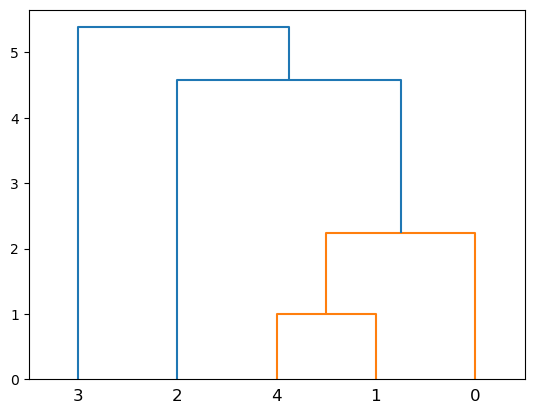

In [9]:
dendrogram(Z,)

In [10]:
root_node, node_list = to_tree(Z, rd = True)

In [11]:
print(f"ID: {root_node.id}. Count: {root_node.count}.\nLeft: {root_node.left}\nRight: {root_node.right}")

ID: 8. Count: 5.
Left: <scipy.cluster.hierarchy.ClusterNode object at 0x13fdfe520>
Right: <scipy.cluster.hierarchy.ClusterNode object at 0x13fe09950>


In [18]:
def explore_tree(node, prefix = ''):
    print(f"{prefix}ID: {node.id}, Count: {node.count}, isLeaf: {node.is_leaf()}")
    print(f"{prefix}Pre order: {node.pre_order()}")
    if not node.is_leaf():
        prefix = f"{prefix}\t"
        explore_tree(node.left, prefix=prefix)
        explore_tree(node.right, prefix=prefix)

In [19]:
explore_tree(root_node)

ID: 8, Count: 5, isLeaf: False
Pre order: [3, 2, 4, 1, 0]
	ID: 3, Count: 1, isLeaf: True
	Pre order: [3]
	ID: 7, Count: 4, isLeaf: False
	Pre order: [2, 4, 1, 0]
		ID: 2, Count: 1, isLeaf: True
		Pre order: [2]
		ID: 6, Count: 3, isLeaf: False
		Pre order: [4, 1, 0]
			ID: 5, Count: 2, isLeaf: False
			Pre order: [4, 1]
				ID: 4, Count: 1, isLeaf: True
				Pre order: [4]
				ID: 1, Count: 1, isLeaf: True
				Pre order: [1]
			ID: 0, Count: 1, isLeaf: True
			Pre order: [0]
